In [45]:
import copy
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

from Function import Window_LogReg,Window_pca,Window_rf,Window_KNN,Model_return,Plot_return,Plot_return_baseline

In [46]:
folderpath = 'C:/Users/deku2/PycharmProjects/AppliedProject/Processing/Processed_data/'
sentiment = pd.read_csv(folderpath + 'Processed_bitcoin_2017-12-01_2021-07-01_withlags_minmax.csv')
sentiment = sentiment.rename(columns={"created_at": "Date"})
sentiment = sentiment.set_index('Date')
price = pd.read_csv(folderpath + 'Processed_BTC-USD_withlags_3%.csv')
price = price.set_index('Date')
data = pd.concat([sentiment,price], axis=1)

In [47]:
X_test = data.drop(columns=['State','State_tmr'])
Y_test = data['State_tmr']
Return_test = X_test['Return']
seed = 123
np.random.seed(seed)
performance_measures = ['precision', 'recall', 'f5', 'roc_auc', 'accuracy']

In [48]:
y_test = [1]*len(Return_test[1096+1:])
baseline = Model_return(Return_test[1096+1:], y_test)
baseline[-1]

1.1929139444651071

In [5]:
# Set performance to Performance(Y_train[1096:], y_pred[1096:])
# X_train[912:]

In [ ]:
def Plot_return_baseline1(returns, baseline):
    df = returns.T
    df['baseline'] = baseline
    df.columns = ['180_moving_window', '365_moving_window', '730_moving_window', 'baseline']
    return df

In [6]:
#State tmr moving window better
columns = ['parameter', 'windows'] + performance_measures + ['model_return']
results = []
model_returns = []
parameter = ['l2']
windows = [180,365,730]
for para in parameter:
    for window in windows:
        print('parameter =',para, '\twindow = ', window)
        start = time.time()
        result, model_return = Window_LogReg(X_test, Y_test, Return_test, window, 1, 0, para)
        end = time.time()
        results.append([para,window] + result + [model_return[-1]])
        model_returns.append(model_return)
        print('time taken = ', np.round((end - start)/60, 1), 'min', result)
logreg_under = pd.DataFrame(results,columns=columns)
logreg_under.to_csv(f'standard/logreg_under.csv')
logreg_under_returns = pd.DataFrame(model_returns)
logreg_under_returns.to_csv(f'standard/logreg_under_returns.csv')

parameter = l2 	window =  180
time taken =  0.3 min [0.23976608187134502, 0.9761904761904762, 0.873054873054873, 0.5204693388146625, 0.27624309392265195]
parameter = l2 	window =  365
time taken =  0.3 min [0.23204419889502761, 1.0, 0.8870836718115354, 0.5, 0.23204419889502761]
parameter = l2 	window =  730
time taken =  0.2 min [0.23204419889502761, 1.0, 0.8870836718115354, 0.5, 0.23204419889502761]


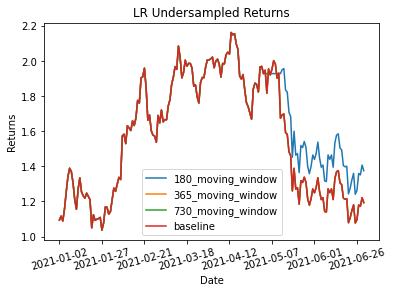

In [81]:
df = Plot_return_baseline1(logreg_under_returns, baseline)
ax = df.plot.line(title='LR Undersampled Returns')
ax.set_xlabel("Date")
ax.set_ylabel("Returns")
plt.xticks(rotation=15)
plt.savefig(f'plot/logreg_under_returns.png', dpi=500, bbox_inches='tight')

In [8]:
columns = ['parameter', 'windows'] + performance_measures + ['model_return']
results = []
model_returns = []
parameter = ['l2']
windows = [180,365,730]
for para in parameter:
    for window in windows:
        print('parameter =',para, '\twindow = ', window)
        start = time.time()
        result, model_return = Window_LogReg(X_test, Y_test, Return_test, window, 1, 1, para)
        end = time.time()
        results.append([para,window] + result + [model_return[-1]])
        model_returns.append(model_return)
        print('time taken = ', np.round((end - start)/60, 1), 'min', result)
logreg_over = pd.DataFrame(results,columns=columns)
logreg_over.to_csv(f'standard/logreg_over.csv')
logreg_over_returns = pd.DataFrame(model_returns)
logreg_over_returns.to_csv(f'standard/logreg_over_returns.csv')

parameter = l2 	window =  180
time taken =  0.4 min [0.2767857142857143, 0.7380952380952381, 0.6936316695352841, 0.577680712572799, 0.49171270718232046]
parameter = l2 	window =  365
time taken =  0.4 min [0.2222222222222222, 0.7619047619047619, 0.6968174204355109, 0.4780746831106543, 0.3259668508287293]
parameter = l2 	window =  730
time taken =  0.3 min [0.25161290322580643, 0.9285714285714286, 0.8414937759336099, 0.5470195272353546, 0.3425414364640884]


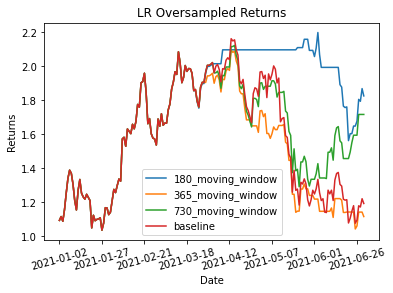

In [82]:
df = Plot_return_baseline1(logreg_over_returns, baseline)
ax = df.plot.line(title='LR Oversampled Returns')
ax.set_xlabel("Date")
ax.set_ylabel("Returns")
plt.xticks(rotation=15)
plt.savefig(f'plot/logreg_over_returns.png', dpi=500, bbox_inches='tight')

In [10]:
columns = ['parameter', 'PCA', 'windows'] + performance_measures + ['model_return']
results = []
model_returns = []
parameter = ['l2','l2','l2']
pca_para = [2, 2, 2]
windows = [180,365,730]
for para, pca, window in zip(parameter,pca_para,windows):
    print('parameter = ',para, '\tPCA = ',pca, '\twindow = ', window)
    start = time.time()
    result, model_return = Window_pca(X_test, Y_test, Return_test, window, 1, 0, pca, para)
    end = time.time()
    results.append([para,pca,window] + result + [model_return[-1]])
    model_returns.append(model_return)
    print('time taken = ', np.round((end - start)/60, 1), 'min', result)
pca_under = pd.DataFrame(results,columns=columns)
pca_under.to_csv(f'standard/pca_under.csv')
pca_under_returns = pd.DataFrame(model_returns)
pca_under_returns.to_csv(f'standard/pca_under_returns.csv')

parameter =  l2 	PCA =  2 	window =  180
time taken =  0.4 min [0.23837209302325582, 0.9761904761904762, 0.8723404255319148, 0.5168722165125043, 0.27071823204419887]
parameter =  l2 	PCA =  2 	window =  365
time taken =  0.4 min [0.23204419889502761, 1.0, 0.8870836718115354, 0.5, 0.23204419889502761]
parameter =  l2 	PCA =  2 	window =  730
time taken =  0.2 min [0.23204419889502761, 1.0, 0.8870836718115354, 0.5, 0.23204419889502761]


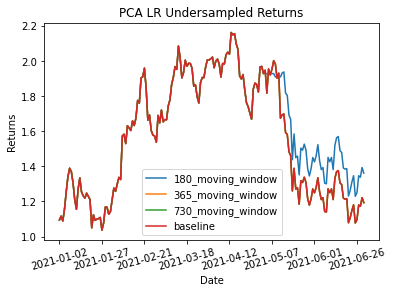

In [83]:
df = Plot_return_baseline1(pca_under_returns, baseline)
ax = df.plot.line(title='PCA LR Undersampled Returns')
ax.set_xlabel("Date")
ax.set_ylabel("Returns")
plt.xticks(rotation=15)
plt.savefig(f'plot/pca_under_returns.png', dpi=500, bbox_inches='tight')

In [12]:
columns = ['parameter', 'PCA', 'windows'] + performance_measures + ['model_return']
results = []
model_returns = []
parameter = ['l2','l2','l2']
pca_para = [5, 2, 5]
windows = [180,365,730]
for para, pca, window in zip(parameter,pca_para,windows):
    print('parameter = ',para, '\tPCA = ',pca, '\twindow = ', window)
    start = time.time()
    result, model_return = Window_pca(X_test, Y_test, Return_test, window, 1, 1, pca, para)
    end = time.time()
    results.append([para,pca,window] + result + [model_return[-1]])
    model_returns.append(model_return)
    print('time taken = ', np.round((end - start)/60, 1), 'min', result)
pca_over = pd.DataFrame(results,columns=columns)
pca_over.to_csv(f'standard/pca_over.csv')
pca_over_returns = pd.DataFrame(model_returns)
pca_over_returns.to_csv(f'standard/pca_over_returns.csv')

parameter =  l2 	PCA =  5 	window =  180
time taken =  0.5 min [0.2882882882882883, 0.7619047619047619, 0.7166236003445305, 0.5967797190818773, 0.5082872928176796]
parameter =  l2 	PCA =  2 	window =  365
time taken =  0.4 min [0.23204419889502761, 1.0, 0.8870836718115354, 0.5, 0.23204419889502761]
parameter =  l2 	PCA =  5 	window =  730
time taken =  0.3 min [0.23595505617977527, 1.0, 0.8892508143322475, 0.5107913669064748, 0.24861878453038674]


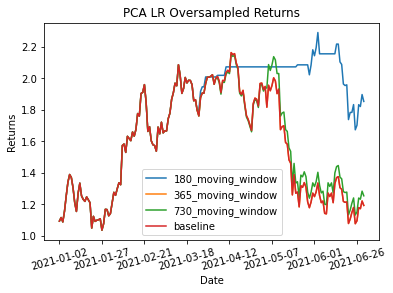

In [84]:
df = Plot_return_baseline1(pca_over_returns, baseline)
ax = df.plot.line(title='PCA LR Oversampled Returns')
ax.set_xlabel("Date")
ax.set_ylabel("Returns")
plt.xticks(rotation=15)
plt.savefig(f'plot/pca_over_returns.png', dpi=500, bbox_inches='tight')

In [89]:
columns = ['n_neighbors', 'windows'] + performance_measures + ['model_return']
results = []
model_returns = []
n_neighbors = [15, 15, 15]
windows = [180,365,730]
for n, window in zip(n_neighbors,windows):
    print('n_neighbors = ',n,'window = ', window)
    start = time.time()
    result, model_return = Window_KNN(X_test, Y_test, Return_test, window, 1, 0, n)
    end = time.time()
    results.append([n,window] + result + [model_return[-1]])
    model_returns.append(model_return)
    print('time taken = ', np.round((end - start)/60, 1), 'min', result)
KNN_under = pd.DataFrame(results,columns=columns)
KNN_under.to_csv(f'standard/KNN_under.csv')
KNN_under_returns = pd.DataFrame(model_returns)
KNN_under_returns.to_csv(f'standard/KNN_under_returns.csv')

n_neighbors =  15 window =  180
time taken =  0.4 min [0.26666666666666666, 0.8571428571428571, 0.789873417721519, 0.5724563206577595, 0.4198895027624309]
n_neighbors =  15 window =  365
time taken =  0.3 min [0.23204419889502761, 1.0, 0.8870836718115354, 0.5, 0.23204419889502761]
n_neighbors =  15 window =  730
time taken =  0.2 min [0.23204419889502761, 1.0, 0.8870836718115354, 0.5, 0.23204419889502761]


(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 10 Text major ticklabel objects>)

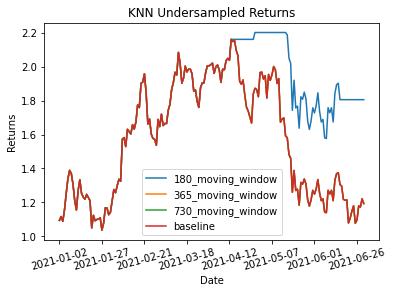

In [90]:
df = Plot_return_baseline1(KNN_under_returns, baseline)
ax = df.plot.line(title='KNN Undersampled Returns')
ax.set_xlabel("Date")
ax.set_ylabel("Returns")
plt.xticks(rotation=15)
plt.savefig(f'plot/KNN_under_returns.png', dpi=500, bbox_inches='tight')

In [93]:
columns = ['n_neighbors', 'windows'] + performance_measures + ['model_return']
results = []
model_returns = []
n_neighbors = [50, 50, 50]
windows = [180,365,730]
for n, window in zip(n_neighbors,windows):
    print('n_neighbors = ',n,'window = ', window)
    start = time.time()
    result, model_return = Window_KNN(X_test, Y_test, Return_test, window, 1, 1, n)
    end = time.time()
    results.append([n,window] + result + [model_return[-1]])
    model_returns.append(model_return)
    print('time taken = ', np.round((end - start)/60, 1), 'min', result)
KNN_over = pd.DataFrame(results,columns=columns)
KNN_over.to_csv(f'standard/KNN_over.csv')
KNN_over_returns = pd.DataFrame(model_returns)
KNN_over_returns.to_csv(f'standard/KNN_over_returns.csv')

n_neighbors =  50 window =  180
time taken =  0.4 min [0.2578125, 0.7857142857142857, 0.7283531409168081, 0.5511305241521068, 0.425414364640884]
n_neighbors =  50 window =  365
time taken =  0.3 min [0.25153374233128833, 0.9761904761904762, 0.8788128606760098, 0.5492463172319287, 0.32044198895027626]
n_neighbors =  50 window =  730
time taken =  0.2 min [0.25301204819277107, 1.0, 0.8980263157894737, 0.5539568345323741, 0.3149171270718232]


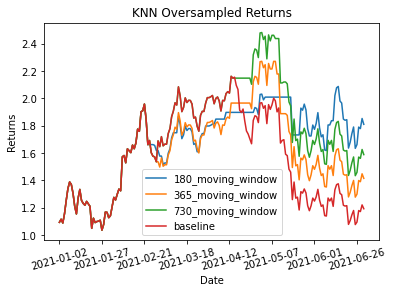

In [94]:
df = Plot_return_baseline1(KNN_over_returns, baseline)
ax = df.plot.line(title='KNN Oversampled Returns')
ax.set_xlabel("Date")
ax.set_ylabel("Returns")
plt.xticks(rotation=15)
plt.savefig(f'plot/KNN_over_returns.png', dpi=500, bbox_inches='tight')

In [18]:
columns = ['n_estimators', 'max_depth', 'windows'] + performance_measures + ['model_return']
results = []
model_returns = []
n_estimators = [50, 10, 50]
max_depth = [10, 10, 10]
windows = [180,365,730]
for n, m_depth, window in zip(n_estimators,max_depth,windows):
    print('n_estimators = ',n, '\tmax_depth = ',m_depth, '\twindow = ', window)
    start = time.time()
    result, model_return = Window_rf(X_test, Y_test, Return_test, window, 1, 0, n, m_depth)
    end = time.time()
    results.append([n,m_depth,window] + result + [model_return[-1]])
    model_returns.append(model_return)
    print('time taken = ', np.round((end - start)/60, 1), 'min', result)
rf_under = pd.DataFrame(results,columns=columns)
rf_under.to_csv(f'standard/rf_under.csv')
rf_under_returns = pd.DataFrame(model_returns)
rf_under_returns.to_csv(f'standard/rf_under_returns.csv')

n_estimators =  50 	max_depth =  10 	window =  180
time taken =  1.9 min [0.24550898203592814, 0.9761904761904762, 0.8759244042728019, 0.5348578280232956, 0.2983425414364641]
n_estimators =  10 	max_depth =  10 	window =  365
time taken =  0.7 min [0.23333333333333334, 1.0, 0.8878048780487805, 0.5035971223021583, 0.23756906077348067]
n_estimators =  50 	max_depth =  10 	window =  730
time taken =  1.1 min [0.23204419889502761, 1.0, 0.8870836718115354, 0.5, 0.23204419889502761]


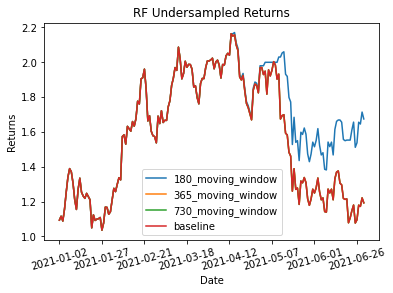

In [80]:
df = Plot_return_baseline1(rf_under_returns, baseline)
ax = df.plot.line(title='RF Undersampled Returns')
ax.set_xlabel("Date")
ax.set_ylabel("Returns")
plt.xticks(rotation=15)
plt.savefig(f'plot/rf_under_returns.png', dpi=500, bbox_inches='tight')

In [20]:
columns = ['n_estimators', 'max_depth', 'windows'] + performance_measures + ['model_return']
results = []
model_returns = []
n_estimators = [10, 10, 10]
max_depth = [20, 20, 10]
windows = [180,365,730]
for n, m_depth, window in zip(n_estimators,max_depth,windows):
    print('n_estimators = ',n, '\tmax_depth = ',m_depth, '\twindow = ', window)
    start = time.time()
    result, model_return = Window_rf(X_test, Y_test, Return_test, window, 1, 1, n, m_depth)
    end = time.time()
    results.append([n,m_depth,window] + result + [model_return[-1]])
    model_returns.append(model_return)
    print('time taken = ', np.round((end - start)/60, 1), 'min', result)
rf_over = pd.DataFrame(results,columns=columns)
rf_over.to_csv(f'standard/rf_over.csv')
rf_over_returns = pd.DataFrame(model_returns)
rf_over_returns.to_csv(f'standard/rf_over_returns.csv')

n_estimators =  10 	max_depth =  20 	window =  180
time taken =  0.9 min [0.13636363636363635, 0.07142857142857142, 0.07276119402985075, 0.4673689619732785, 0.6795580110497238]
n_estimators =  10 	max_depth =  20 	window =  365
time taken =  0.9 min [0.21875, 0.16666666666666666, 0.16820702402957485, 0.49340527577937654, 0.6685082872928176]
n_estimators =  10 	max_depth =  10 	window =  730
time taken =  0.6 min [0.3018867924528302, 0.38095238095238093, 0.37715321849501354, 0.5573826652963344, 0.6519337016574586]


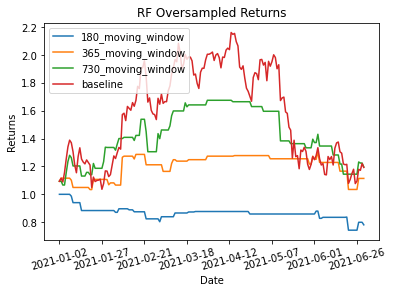

In [79]:
df = Plot_return_baseline1(rf_over_returns, baseline)
ax = df.plot.line(title='RF Oversampled Returns')
ax.set_xlabel("Date")
ax.set_ylabel("Returns")
plt.xticks(rotation=15)
plt.savefig(f'plot/rf_over_returns.png', dpi=500, bbox_inches='tight')